In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns 
import numpy as np 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('../data/breast_cancer.csv')

In [4]:
#project Paths 

modelPatrh = '../models'
outputPath = '../output'

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape

(569, 32)

In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000,869218.000,906024.000,8813129.000,9.113205e+08
radius_mean,569.0,1.412700e+01,3.524000e+00,6.981,11.700,13.370,15.780,2.811000e+01
texture_mean,569.0,1.929000e+01,4.301000e+00,9.710,16.170,18.840,21.800,3.928000e+01
perimeter_mean,569.0,9.196900e+01,2.429900e+01,43.790,75.170,86.240,104.100,1.885000e+02
area_mean,569.0,6.548890e+02,3.519140e+02,143.500,420.300,551.100,782.700,2.501000e+03
smoothness_mean,569.0,9.600000e-02,1.400000e-02,0.053,0.086,0.096,0.105,1.630000e-01
compactness_mean,569.0,1.040000e-01,5.300000e-02,0.019,0.065,0.093,0.130,3.450000e-01
concavity_mean,569.0,8.900000e-02,8.000000e-02,0.000,0.030,0.062,0.131,4.270000e-01
concave_points_mean,569.0,4.900000e-02,3.900000e-02,0.000,0.020,0.034,0.074,2.010000e-01
symmetry_mean,569.0,1.810000e-01,2.700000e-02,0.106,0.162,0.179,0.196,3.040000e-01


In [10]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [11]:
df['diagnosis'] = df['diagnosis'].replace(['M','B'],[1,0])

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
newDF = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']]

In [15]:
newDF.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [16]:
newDF.duplicated().sum()

0

In [17]:
newDF.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [18]:
# Let's check the number of unique values in each column
newDF.nunique()

radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
diagnosis                    2
dtype: int64

In [19]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

/var/folders/7l/vrmpqzgj147gr6n6n8tc__pm0000gn/T/ipykernel_47693/2370064758.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f2, (ax_box2, ax_hist2) = plt.subplots(


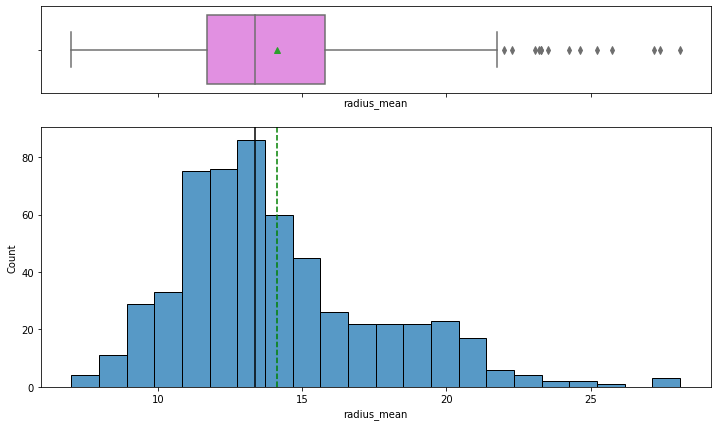

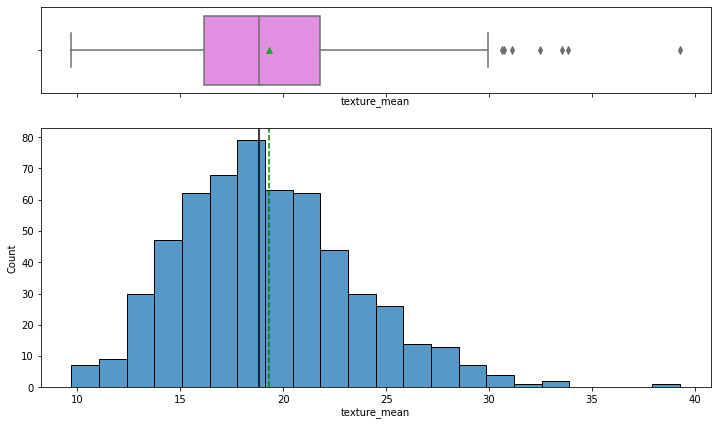

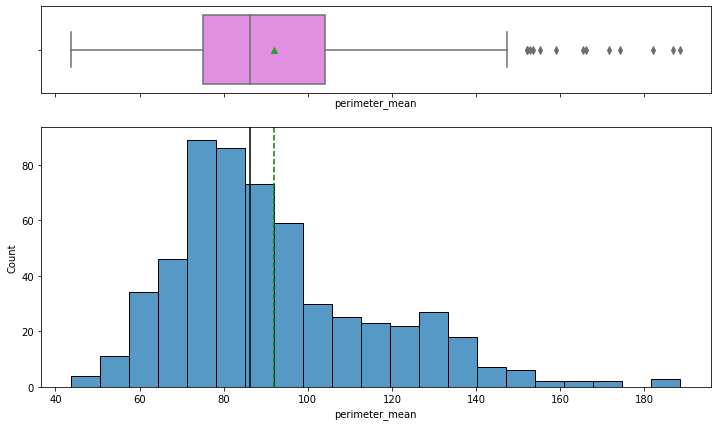

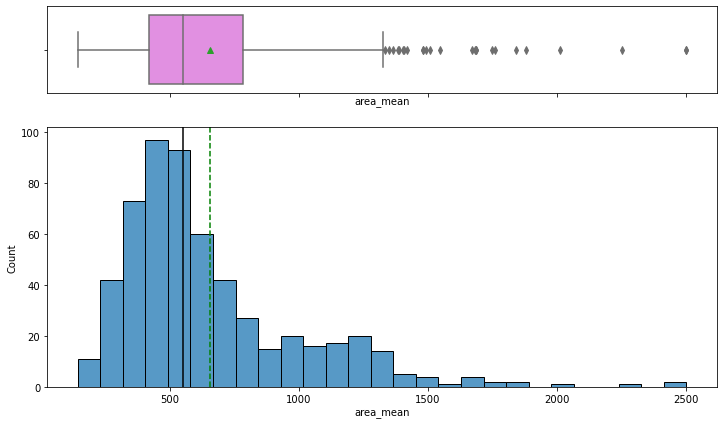

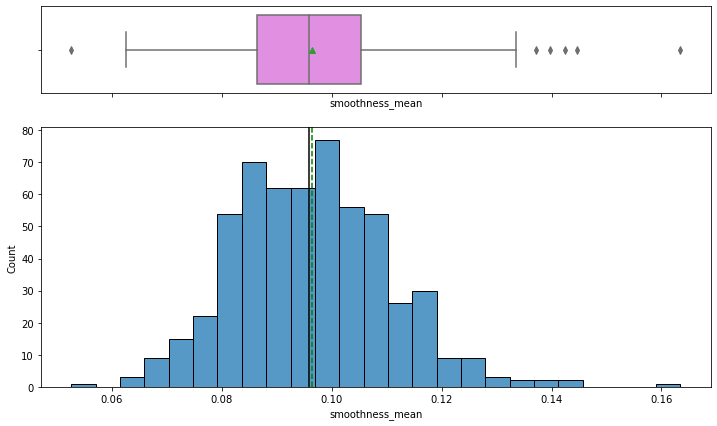

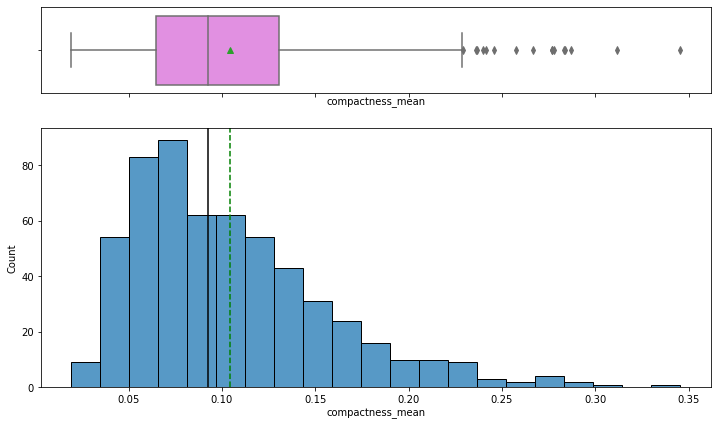

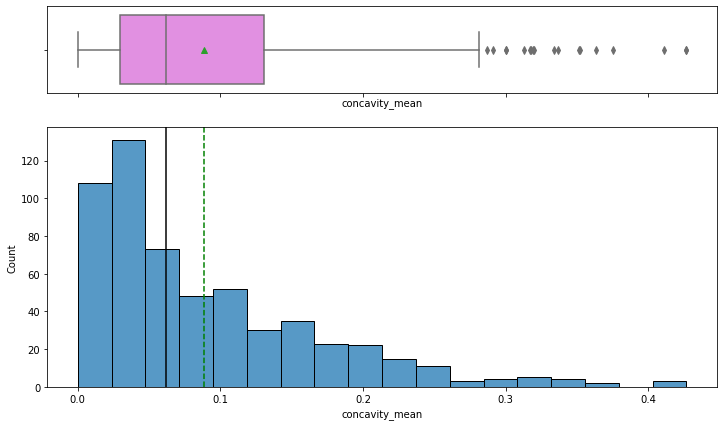

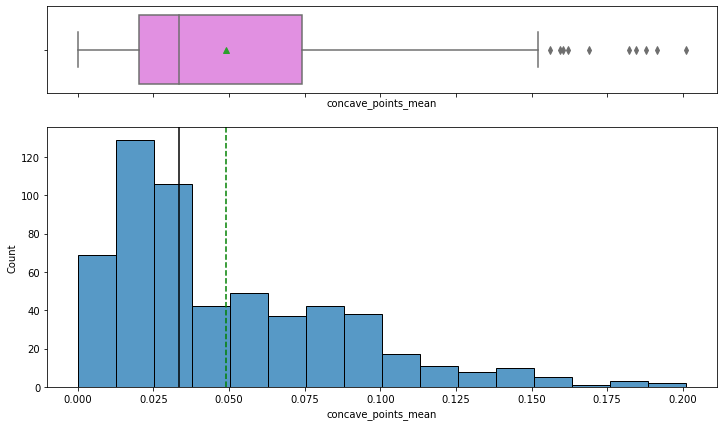

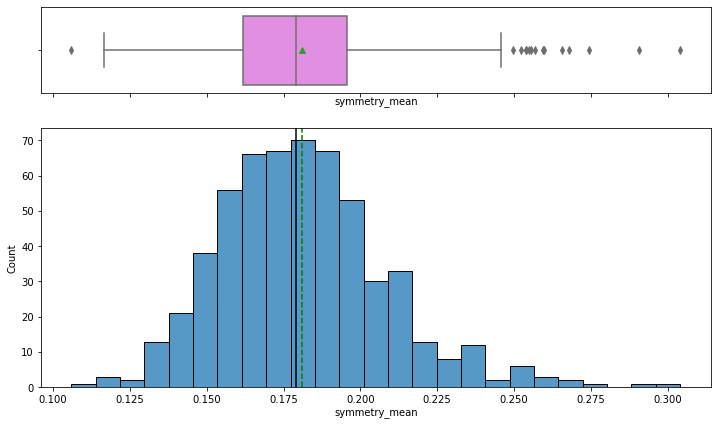

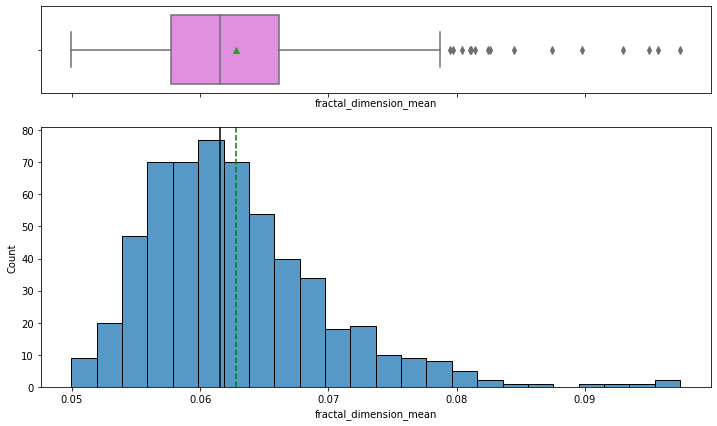

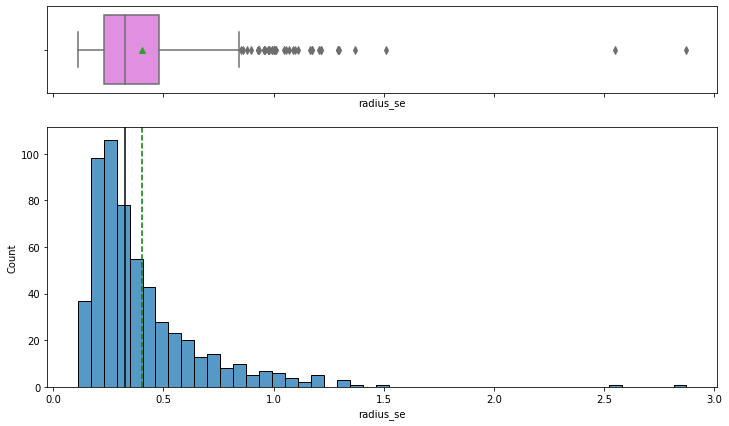

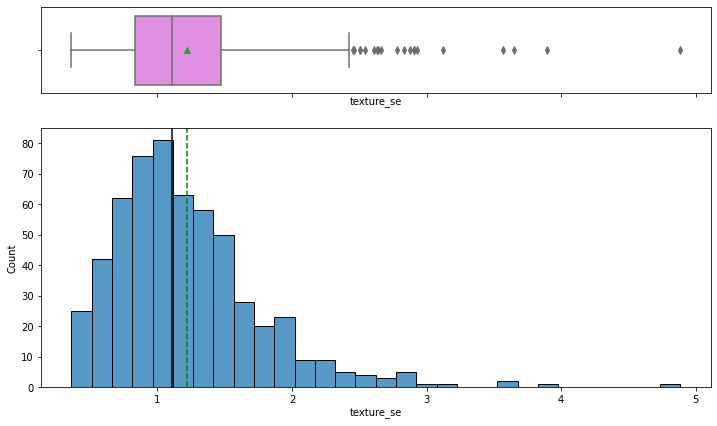

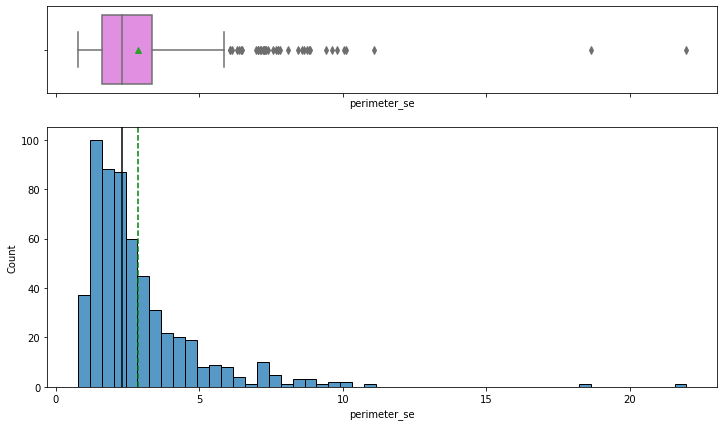

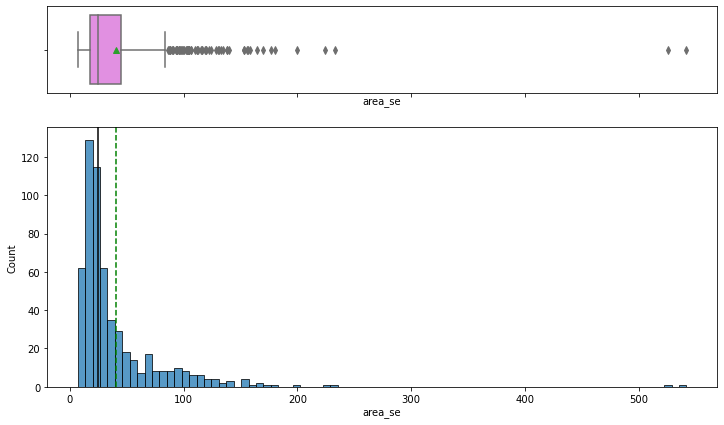

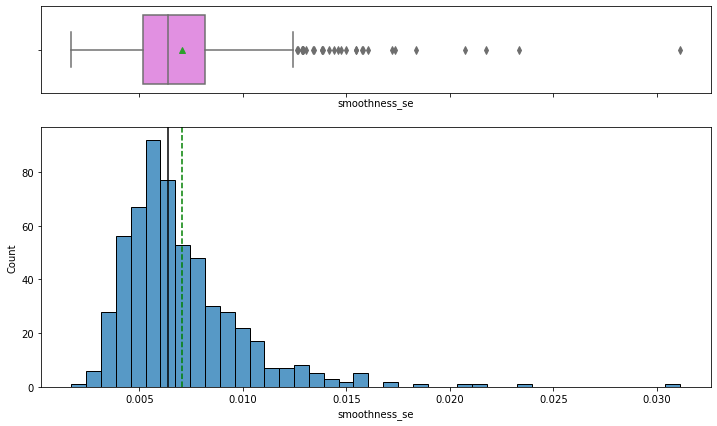

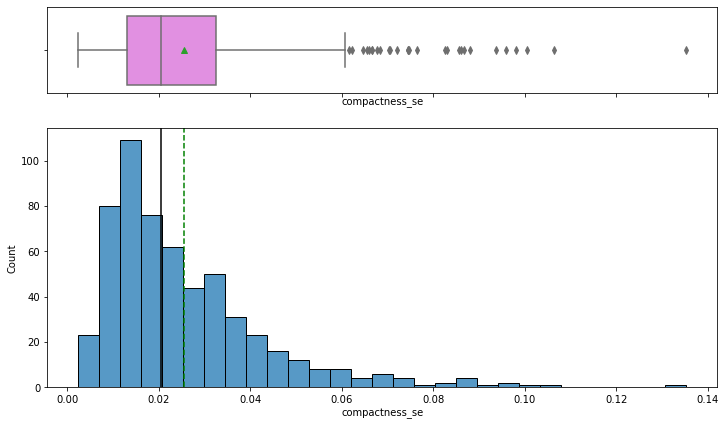

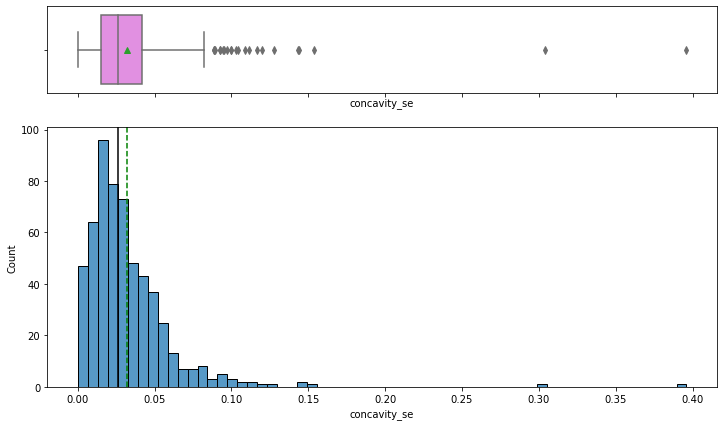

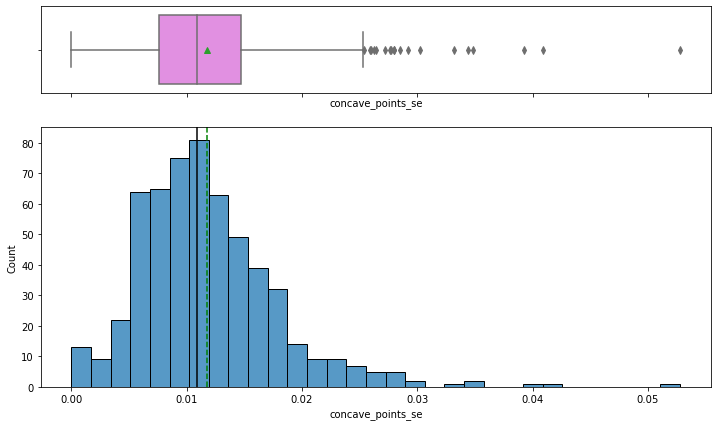

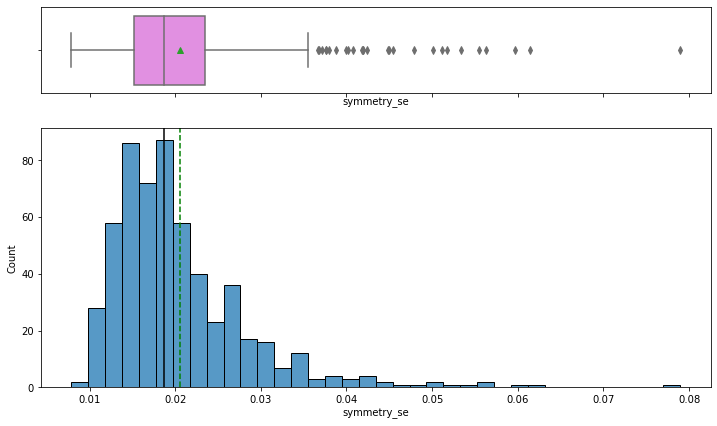

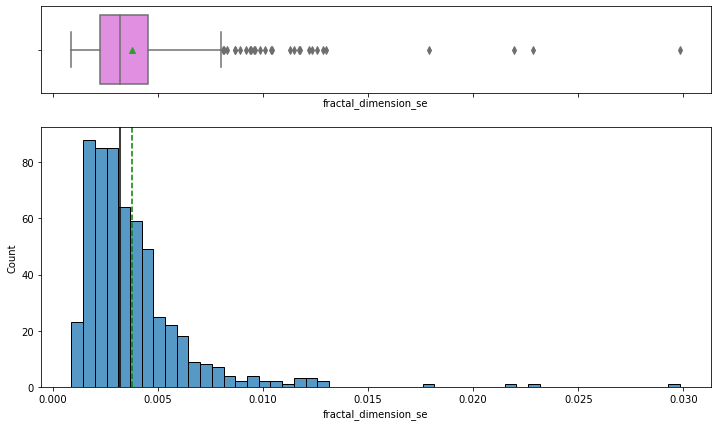

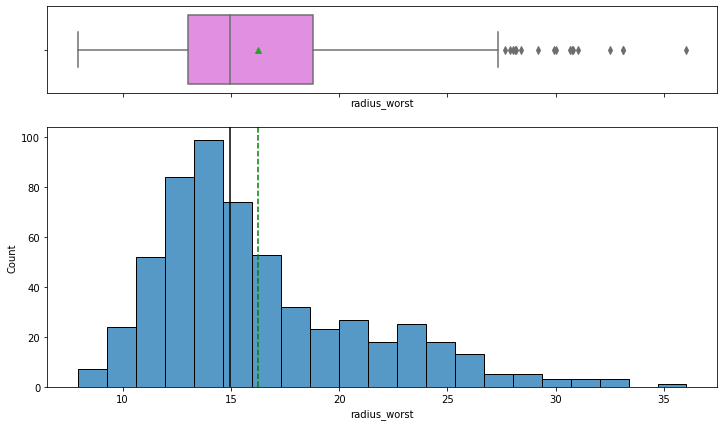

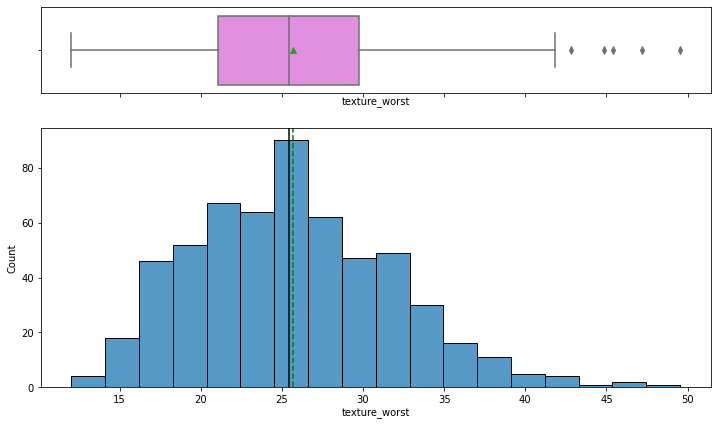

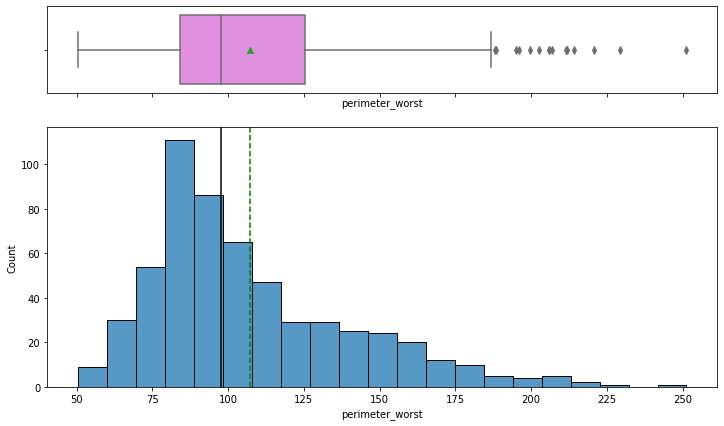

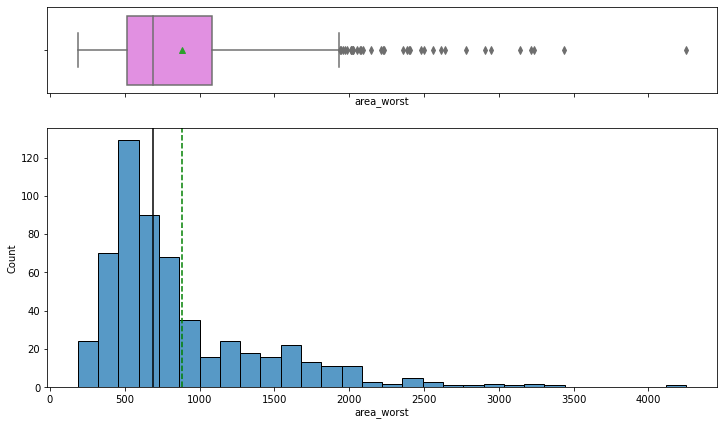

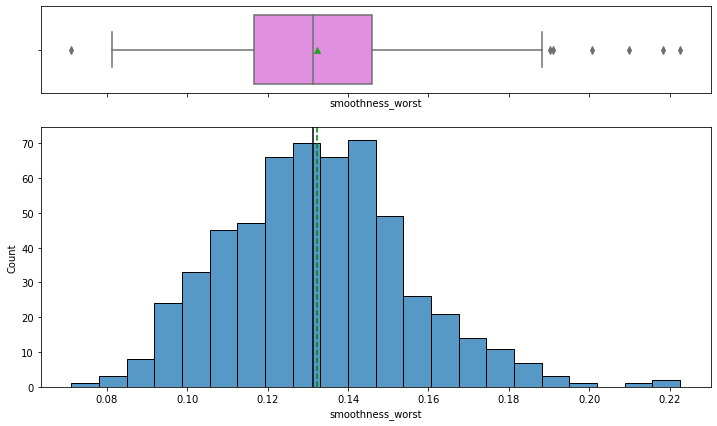

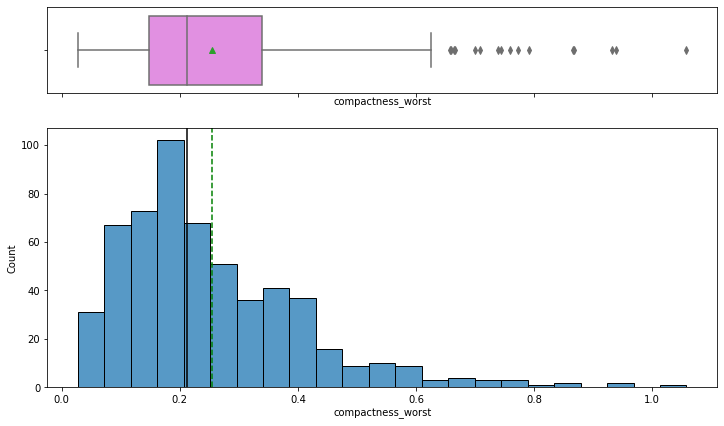

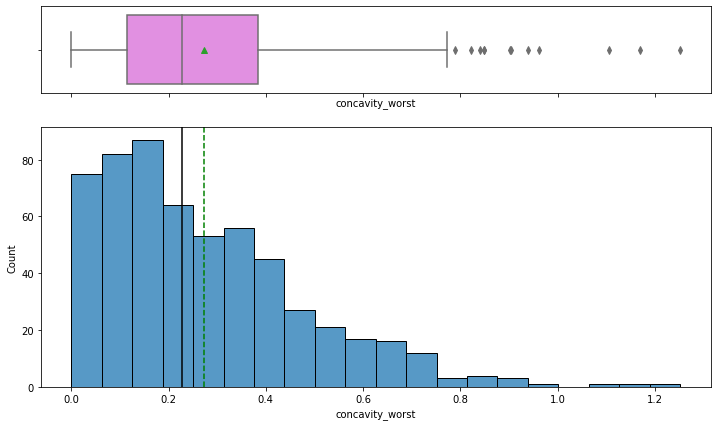

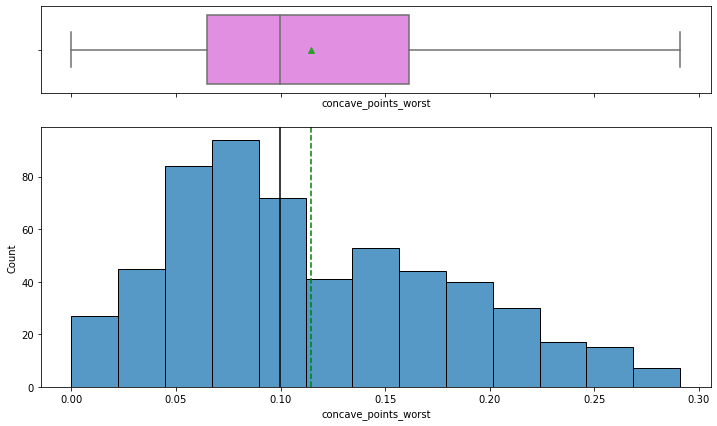

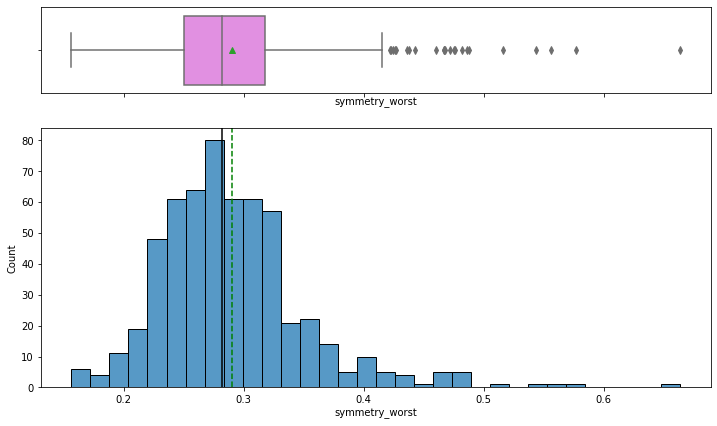

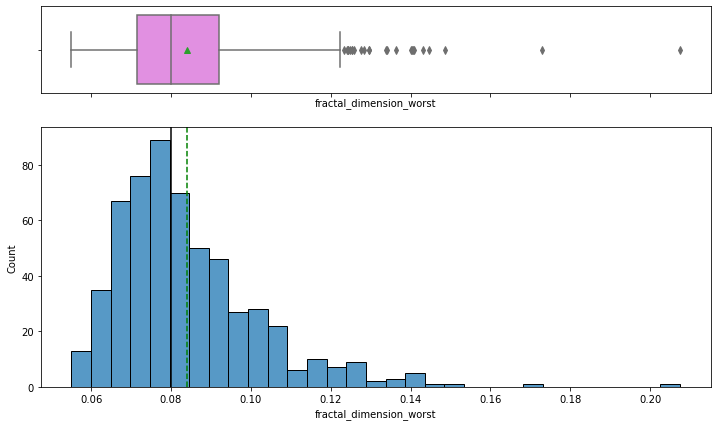

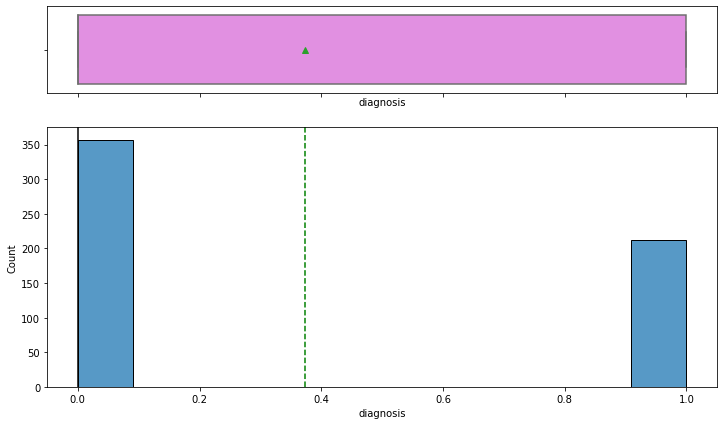

In [20]:
#calling the function to print boxplot and histogram
for column in newDF.columns:
#     print(column)
    histogram_boxplot(newDF, column)

/Users/hameed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='perimeter_worst'>

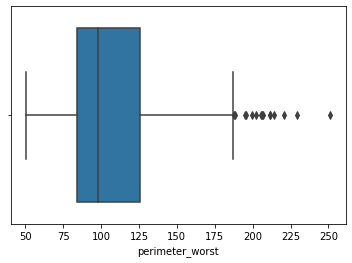

In [21]:
sns.boxplot(newDF['perimeter_worst'])

/Users/hameed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_mean'>

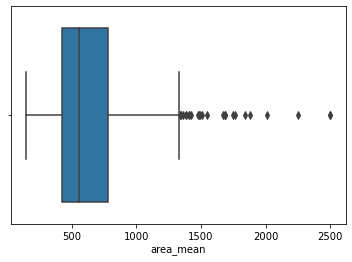

In [22]:

sns.boxplot(newDF['area_mean'])

/Users/hameed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_worst'>

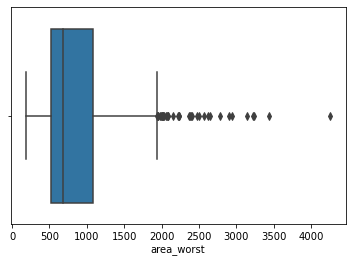

In [23]:
sns.boxplot(newDF['area_worst'])

In [24]:
newDF.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [29]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls 

#create an empty list to store the output indices 
index_list = []
for feature in list(newDF.columns):
    index_list.extend(outliers(newDF,feature))
    
#define a function called 'remove' which returns a cleaned dataframe without outliers 

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [30]:
df_cleaned = remove(newDF, index_list)

In [31]:
df_cleaned.shape

(398, 31)

/Users/hameed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_worst'>

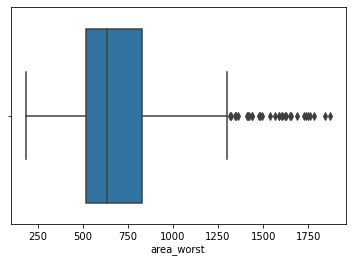

In [32]:
sns.boxplot(df_cleaned['area_worst'])

In [33]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,398.0,13.376209,2.484104,6.981000,11.710000,12.995000,14.640000,20.590000
texture_mean,398.0,18.505879,3.911148,9.710000,15.702500,18.175000,20.755000,29.810000
perimeter_mean,398.0,86.403266,16.841597,43.790000,75.065000,84.065000,94.730000,137.800000
area_mean,398.0,570.547990,222.883241,143.500000,420.350000,518.300000,664.200000,1320.000000
smoothness_mean,398.0,0.093271,0.012066,0.062510,0.084520,0.092385,0.101750,0.125700
compactness_mean,398.0,0.086260,0.034979,0.019380,0.059592,0.079455,0.108975,0.202200
concavity_mean,398.0,0.060442,0.049068,0.000000,0.025628,0.045580,0.083572,0.254500
concave_points_mean,398.0,0.035902,0.025625,0.000000,0.018640,0.028295,0.049478,0.125900
symmetry_mean,398.0,0.173639,0.020819,0.116700,0.159000,0.172250,0.188500,0.245900
fractal_dimension_mean,398.0,0.061211,0.005015,0.049960,0.057337,0.060855,0.064213,0.078180


In [34]:
#Standardizing the Data 
scaleStandard = StandardScaler()
df_cleaned = scaleStandard.fit_transform(df_cleaned)


In [35]:
df_cleaned = pd.DataFrame(df_cleaned, columns = newDF.columns)

In [36]:
df_cleaned.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.964461,0.377377,1.973596,2.108920,0.112751,0.650915,1.066356,1.488638,0.277054,-0.756789,...,0.521788,2.468580,2.665355,0.767070,0.428375,1.121869,1.941020,0.625692,0.333092,1.749636
1,0.134540,0.594978,0.225722,0.033027,2.126689,2.239566,0.677832,0.935739,2.210386,2.655183,...,0.607065,0.541116,0.511879,1.815139,1.456575,0.369659,1.187592,0.931552,2.854076,1.749636
2,1.065623,1.211941,0.968866,1.020884,-0.930314,-0.560180,-0.560181,-0.104415,-1.002217,-0.846630,...,1.626840,1.138359,1.280326,-0.523241,-0.524523,-0.459405,0.068471,0.361226,0.400490,1.749636
3,0.968887,-0.157666,1.022372,0.945414,0.317713,1.229127,0.797817,1.178389,0.507899,-0.077988,...,0.454277,1.712978,1.732891,0.539659,3.248023,1.244971,1.696556,2.302172,2.027655,1.749636
4,0.997102,1.393701,1.028317,0.953051,-0.768502,0.399021,0.794553,0.693088,0.531946,-1.563363,...,0.521788,0.604460,0.449613,-0.770426,-0.177761,0.127537,0.311933,0.041568,-1.336598,1.749636


In [37]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,398.0,4.842581e-16,1.001259,-2.577693,-0.671593,-0.153652,0.509392,2.907637
texture_mean,398.0,3.994571e-16,1.001259,-2.251756,-0.717669,-0.084706,0.575778,2.893869
perimeter_mean,398.0,2.912243e-16,1.001259,-2.533424,-0.674077,-0.139014,0.495037,3.055614
area_mean,398.0,4.072677e-17,1.001259,-1.918428,-0.674735,-0.234714,0.420713,3.366764
smoothness_mean,398.0,7.213660e-16,1.001259,-2.552584,-0.726182,-0.073540,0.703573,2.690957
compactness_mean,398.0,4.538525e-16,1.001259,-1.914397,-0.763342,-0.194791,0.650200,3.318703
concavity_mean,398.0,-2.789505e-19,1.001259,-1.233364,-0.710417,-0.303273,0.471990,3.959882
concave_points_mean,398.0,3.160509e-16,1.001259,-1.402848,-0.674506,-0.297245,0.530442,3.516585
symmetry_mean,398.0,1.667287e-15,1.001259,-2.738369,-0.704041,-0.066810,0.714699,3.475229
fractal_dimension_mean,398.0,6.365651e-16,1.001259,-2.246157,-0.773259,-0.071000,0.599316,3.387889


In [38]:
#Normalizing the data
scaleMinMax = MinMaxScaler(feature_range=(0,1))
df_cleaned = scaleMinMax.fit_transform(df_cleaned)
df_cleaned = pd.DataFrame(df_cleaned, columns = newDF.columns)

In [39]:
df_cleaned.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.828055,0.510945,0.806404,0.762006,0.508308,0.490209,0.442829,0.587768,0.485294,0.264352,...,0.548387,0.886197,0.842305,0.590802,0.387182,0.489711,0.759733,0.545842,0.436055,1.0
1,0.494452,0.553234,0.493671,0.369231,0.892388,0.793786,0.368016,0.475377,0.796440,0.869950,...,0.565217,0.518924,0.421982,0.789770,0.578969,0.346577,0.611876,0.602559,0.917292,1.0
2,0.664193,0.673134,0.626635,0.556141,0.309384,0.258779,0.129627,0.263940,0.279412,0.248405,...,0.766480,0.632727,0.571971,0.345847,0.209440,0.188818,0.392253,0.496802,0.448920,1.0
3,0.646557,0.406965,0.636209,0.541861,0.547397,0.600700,0.391120,0.524702,0.522446,0.384833,...,0.535063,0.742219,0.660304,0.547630,0.913123,0.513136,0.711758,0.856716,0.759534,1.0
4,0.651701,0.708458,0.637273,0.543306,0.340244,0.442074,0.390491,0.426052,0.526316,0.121191,...,0.548387,0.530994,0.409829,0.298921,0.274121,0.300505,0.440031,0.437527,0.117323,1.0


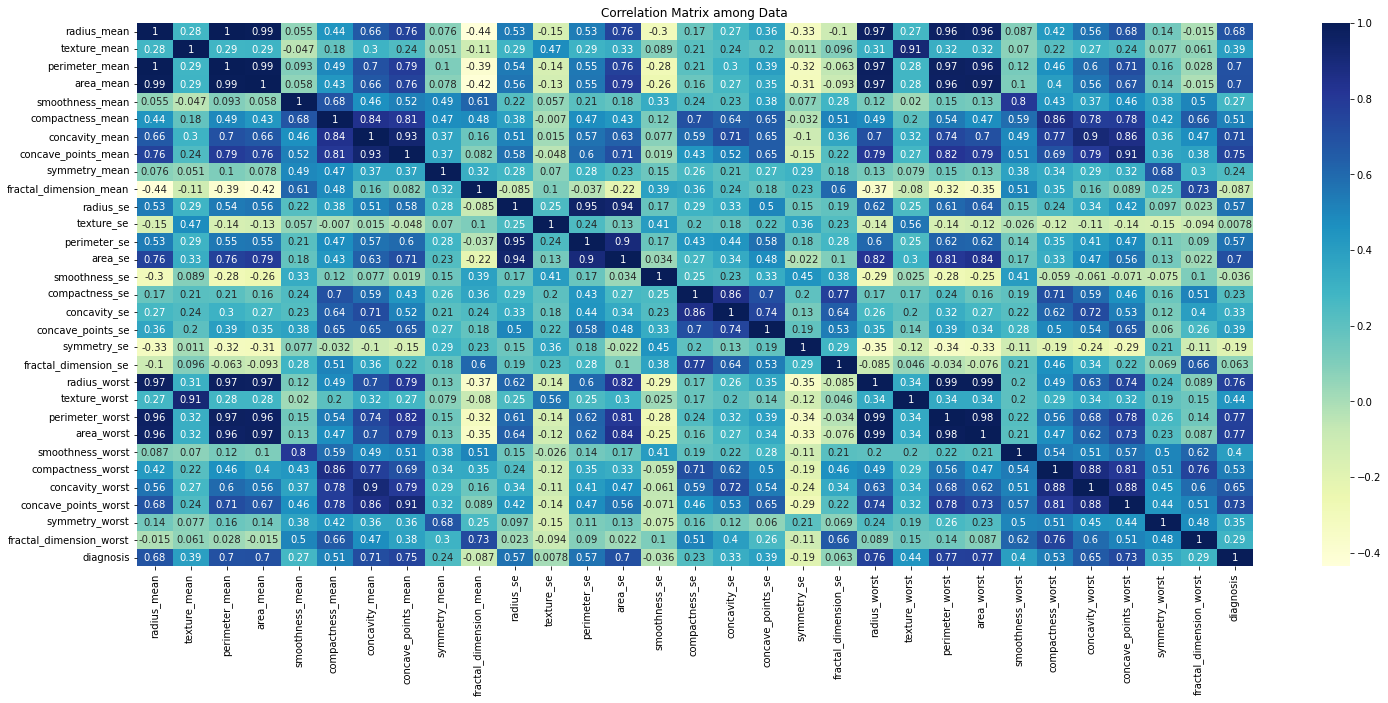

In [51]:
corr_matrix= df_cleaned.corr()
fig,ax=plt.subplots(figsize=(25,10))
ax= sns.heatmap(corr_matrix, annot=True,cmap='YlGnBu');
plt.title('Correlation Matrix among Data');

In [44]:
# Feature Selection using RFE
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


array = df_cleaned.values
X = array[:,0:30]
y = array[:,30]

#feature extraction
model= LogisticRegression(solver='lbfgs')
rfe = RFE(model, n_features_to_select = 15)
fit = rfe.fit(X,y)
print(f'Num Features: {fit.n_features_}')
print(f'Selected Features: {fit.support_}')

Num Features: 15
Selected Features: [ True  True False  True False False  True  True False False  True False
 False  True False False False False False False  True  True  True  True
  True False  True  True  True False]


In [49]:
# Building a model with a seed ranging from 1 to 20
def modelBuilder(algorithm):
    seedSearch = []
    for i in range(21):
        seedSearch.append(i)

    modelList = []
    for seed in seedSearch:
        Xtrain, Xtest, yTrain, yTest = train_test_split(X,y, test_size=0.2,random_state=seed)
        model = algorithm #empty modeland has learnt nothing 

            #send the model to school to learn the functions of x required to predict y
        model.fit(Xtrain,yTrain)
        modelList.append(model.score(Xtest, yTest))

        print(seed, ":", model.score(Xtest, yTest))

        modelList.sort() 

    print(f"The best score for {model} is:  {modelList[-1]}" )
    print('*' * 70)


In [50]:
modelBuilder(LogisticRegression())

0 : 0.9625
1 : 0.975
2 : 0.975
3 : 0.9375
4 : 0.975
5 : 0.95
6 : 0.975
7 : 0.975
8 : 0.9625
9 : 0.95
10 : 0.975
11 : 0.95
12 : 0.9625
13 : 0.9625
14 : 0.9625
15 : 0.9875
16 : 0.9375
17 : 0.9625
18 : 0.9125
19 : 0.9875
20 : 0.975
The best score for LogisticRegression() is:  0.9875
**********************************************************************


In [47]:
modelBuilder(DecisionTreeClassifier(random_state=0))

0 : 0.9375
1 : 0.9125
2 : 0.95
3 : 0.9125
4 : 0.95
5 : 0.9125
6 : 0.9375
7 : 0.95
8 : 0.9125
9 : 0.9375
10 : 0.9
11 : 0.925
12 : 0.8875
13 : 0.9125
14 : 0.925
15 : 0.95
16 : 0.925
17 : 0.9
18 : 0.9375
19 : 0.9375
20 : 0.95
The best score for DecisionTreeClassifier(random_state=0) is:  0.95
**********************************************************************


In [48]:
modelBuilder(RandomForestClassifier(max_depth=5, random_state=0))

0 : 0.9625
1 : 0.975
2 : 0.975
3 : 0.9375
4 : 0.9625
5 : 0.9
6 : 0.9875
7 : 0.975
8 : 0.975
9 : 0.925
10 : 0.975
11 : 0.9625
12 : 0.95
13 : 0.975
14 : 0.925
15 : 0.95
16 : 0.9625
17 : 0.9625
18 : 0.9375
19 : 0.9625
20 : 0.975
The best score for RandomForestClassifier(max_depth=5, random_state=0) is:  0.9875
**********************************************************************


## Logistic Regression and Random Forrest but have best score of 98.7% but on different seed 
